## Data Analysis - Indeed Jobs

### Summary

In this project we analyse **indeed_jobs.csv** dataset obtained by scraping <a href="https://www.indeed.com/">Indeed</a> web 
pages for my project **WebScraping-Indeed**. 

The project covers **data manipulation**, **visualization** and **analysis**.

It is primarily based in Python. It uses Numpy and Pandas libraries for data manipulation and Matplotlib and Seaborn for 
visualizations. 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

### Load data

The dataset is loaded from **indeed_jobs.csv** file into a Pandas dataframe. 

It has **1296 rows and 5 columns**. Each row contains details about one job posting: **Title, Company, Location, Salary
and Summary**.

In [2]:
# Read the csv file with all scraped data
jobs = pd.read_csv("indeed_jobs.csv")

# Print the shape and the first rows
print("Shape of dataframe with all jobs: ", 
      jobs.shape)
print()
jobs.head()

Shape of dataframe with all jobs:  (1296, 5)



,Title,Company,Location,Salary,Summary
0,"AI/ML - Chief of Staff, Machine Intelligence",Apple,"Seattle, WA",NaN,The Machine Intelligence team is accelerating ...
1,"Senior Data Scientist, Rich Media Experiences",Zillow,Washington State•Remote,"$127,100 - $203,000 a year",Using Computer Vision techniques and AI-powere...
2,Machine Learning Engineer,Zillow,Washington State•Remote,"$132,400 - $211,600 a year",These algorithms and platforms ingest large vo...
3,Senior Data Scientist,Zillow,Washington State•Remote,"$127,100 - $203,000 a year",This data can be mined for intelligence on com...
4,"Research Program Manager, Artificial Intelligence",Facebook,"New York, NY",NaN,"We drive efficiency, cultivate relationships, ..."


In [3]:
# Check the column types
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1296 non-null   object
 1   Company   1296 non-null   object
 2   Location  1296 non-null   object
 3   Salary    370 non-null    object
 4   Summary   1296 non-null   object
dtypes: object(5)
memory usage: 50.8+ KB


It can be observed that **all columns** are of **type 'object'**. The **Salary** column has **missing values**. 

### Remove duplicates

In [3]:
# Remove duplicates and 
# reset the index of the dataframe

# Drop duplicates
jobs = jobs.drop_duplicates()

# Reset the index of the df
jobs = jobs.reset_index(drop=True)

# Print the shape of cleaned dataframe
print("Shape of dataframe without duplicates: ",
      jobs.shape)
#jobs.head()

Shape of dataframe without duplicates:  (304, 5)


### Data Analysis and Visualization

Data analysis and visualizations can help us find the answer to some questions like, which **companies** or **locations** have the 
**highest number of job listings**; what is the **average minim or maxim salary**; which is the **count of the
frequently used words in the job title**.

### 1. Which are the companies with the highest number of job listings?

In [4]:
# Group the job Titles by Company
comp_counts = jobs.groupby("Company").\
        count()["Title"].\
        sort_values(ascending=False)

In [5]:
# Check the company for 
# first ten job count
comp_counts.head(10)

Company
Microsoft                    37
Amazon.com Services LLC      21
Zillow                       20
Facebook                     12
Amazon Web Services, Inc.    12
Indeed                       11
Expedia.com                   8
TikTok                        8
Redfin                        7
Shelf Engine                  6
Name: Title, dtype: int64

In [6]:
# Check the total number of jobs for each company
comp_counts.value_counts().\
        sort_values(ascending=True)

37     1
21     1
20     1
11     1
7      1
12     2
8      2
6      2
5      2
4      3
3      3
2     28
1     69
Name: Title, dtype: int64

Text(0.5, 1.0, 'Count of Jobs per Company')

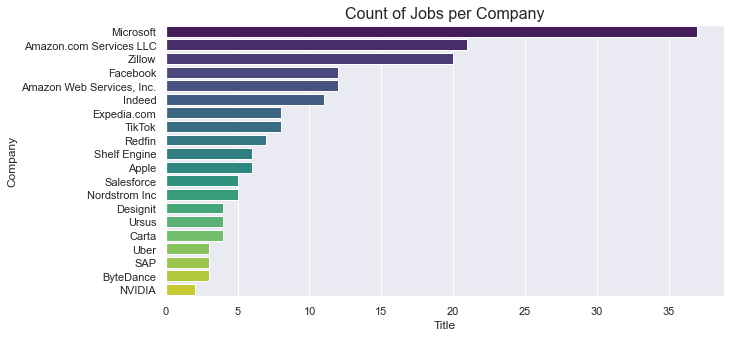

In [7]:
# Visualize the first 20 job Titles by Company

# Define figure size
sns.set(rc={"figure.figsize":(10, 5)}) 

# Display barplot
sns.barplot(x=comp_counts[:20], 
            y=comp_counts[:20].index, 
            palette="viridis")

# Give the plot a title
plt.title('Count of Jobs per Company', 
          fontsize=16)

From the data we observe that **most of the companies have between 1 and 10 jobs**. <br>
There are **69 companies** that posted only **1 job** and **28 companies that listed 2 jobs**.

**Microsoft** has the **highest count** of jobs. It is followed by **Amazon** and **Zillow**, **Facebook** and **Indeed**.

### 2. Which locations have the greatest number of jobs?

In [8]:
# Group the job Titles by Location
loc_counts = jobs.groupby("Location").\
        count()["Title"].\
        sort_values(ascending=False)

# Check the location for
# first ten job count
loc_counts.head(10)

Location
Seattle, WA                                     57
Washington State•Remote                         24
Redmond, WA 98052 (Overlake area)               14
Seattle, WA•Remote                              13
Seattle, WA 98101 (Downtown area)               10
Bellevue, WA                                     9
Seattle, WA•Temporarily Remote                   8
Redmond, WA 98052 (Overlake area)+1 location     8
Seattle, WA 98119 (Queen Anne area)              7
Seattle, WA+1 location                           6
Name: Title, dtype: int64

In [9]:
# Check the total number of jobs for one locations
loc_counts.value_counts().\
        sort_values(ascending=True)

57     1
24     1
14     1
13     1
10     1
9      1
7      1
6      1
8      2
4      2
5      3
3      6
2     21
1     65
Name: Title, dtype: int64

Text(0.5, 1.0, 'Count of Jobs per Location')

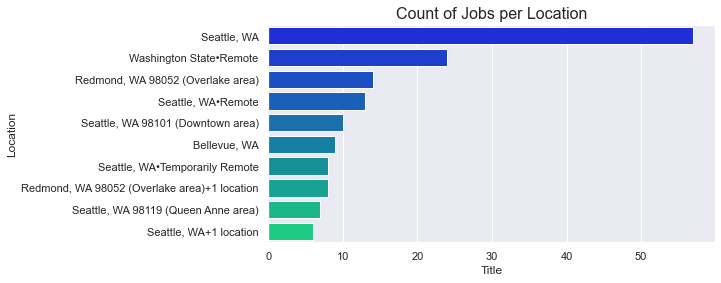

In [10]:
# Visualize the first 10 job Titles by Location

# Define figure size
sns.set(rc={"figure.figsize":(8, 4)}) 

# Display barplot
sns.barplot(x=loc_counts[:10], 
            y=loc_counts[:10].index, 
            palette="winter")

# Give the plot a title
plt.title('Count of Jobs per Location', 
          fontsize=16)

The **highest** concentration of job positions is in **Seattle with 57 counts**. 

Remote positions in **Washington State** come next with **24 count**, followed by **Redmond and Bellevue with
10-14 counts**. 

There are **65 locations** across Washington State that list **1 job** and **21 locations** with **2 positions**.

### 3. What is the average salary?

The **steps** for calculating the **average minim** and **average maxim** salary for all the job postings are:
- **drop** the rows with **missing values** for Salary and reset index
- **check the formatting** of the Salary column
- define a **function to format**, calculate and split Salary in minim and maxim values
- **apply the function** to Salary column
- **calculate the mean** of the columns with minim and maxim salary values

In [11]:
# Drop the rows with missing values for Salary
jobs_salary = jobs[jobs["Salary"] != "None"].dropna()

# Reset the index
jobs_salary.reset_index(inplace=True)

# Drop old index
jobs_salary = jobs_salary.drop(["index"], 
        axis=1)

# Print shape of the dataframe
# with jobs with salary listed
print("Shape of the dataframe with jobs with salary listed: ", 
      jobs_salary.shape)

# Check the first rows
jobs_salary.head(3)

Shape of the dataframe with jobs with salary listed:  (85, 5)


,Title,Company,Location,Salary,Summary
0,"Senior Data Scientist, Rich Media Experiences",Zillow,Washington State•Remote,"$127,100 - $203,000 a year",Using Computer Vision techniques and AI-powere...
1,Machine Learning Engineer,Zillow,Washington State•Remote,"$132,400 - $211,600 a year",These algorithms and platforms ingest large vo...
2,Senior Data Scientist,Zillow,Washington State•Remote,"$127,100 - $203,000 a year",This data can be mined for intelligence on com...


In [12]:
# Check how the salary is formated
jobs_salary['Salary'].value_counts()

$127,100 - $203,000 a year    10
$132,400 - $211,600 a year     5
From $50,000 a year            3
$110,000 - $175,000 a year     3
$118,000 - $170,000 a year     3
$157,900 - $252,200 a year     3
$144,000 a year                2
$112,300 - $160,000 a year     2
$6,217 - $8,156 a month        2
$125,000 - $175,000 a year     2
$50 - $70 an hour              2
Up to $155,700 a year          2
From $100,000 a year           2
$132,000 - $192,000 a year     2
$153,000 - $223,000 a year     2
$70,000 - $85,000 a year       2
$45 - $50 an hour              2
$223,000 - $324,000 a year     2
$100,000 - $200,000 a year     1
$168,600 - $221,900 a year     1
$179,000 - $259,000 a year     1
$130,500 - $163,100 a year     1
$85,000 - $110,000 a year      1
Up to $90 an hour              1
From $60 an hour               1
$76,880 - $120,000 a year      1
$107,800 - $172,200 a year     1
$86,000 a year                 1
$75 - $90 an hour              1
$4,288 - $6,046 a month        1
From $150,

It can be observed that the salary is formatted in different ways. 
The most common formatting is a range between minim and maxim salary (e.g., "127,100-203.000 a year").

In some cases the format is "72.50 an hour" (row 12) or "34.92 an hour" (row 84). 
We replace the float values with an integer.

In [13]:
# Replace "$72.50 an hour" with ""$72 an hour" (row 12), so it works when calculate min and max salary
jobs_salary.loc[jobs_salary.loc[:, "Salary"] == "$72.50 an hour", "Salary"] =  "$72 an hour"
jobs_salary.loc[11:12, :]

,Title,Company,Location,Salary,Summary
11,Cloud Intelligence Associate Specialist SA,"Amazon Web Services, Inc.","Seattle, WA+1 location","$112,300 - $160,000 a year",BA/BS degree or equivalent.Experience with Mic...
12,Fully Remote Server Side Engineer,Actalent,"Everett, WA 98201 (Bayside area)•Remote",$72 an hour,"We use agile processes with rapid iteration, w..."


In [14]:
# Replace "$34.92 an hour" with ""$35 an hour"
jobs_salary.loc[jobs_salary.loc[:, "Salary"] == "$34.92 an hour", "Salary"] =  "$35 an hour"
jobs_salary.loc[83:84, :]

,Title,Company,Location,Salary,Summary
83,"Senior Data Scientist, Rich Media Experiences",Zillow,Washington State+1 location•Remote,"$127,100 - $203,000 a year","Bachelor in Mathematics, Statistics, Engineeri..."
84,Enterprise Data Analyst,Vancouver Public Schools,"Vancouver, WA 98661 (Bagley Downs area)",$35 an hour,Job Description Primary Location Assessment & ...


In [16]:
# Create a function to format the Salary column
def format_salary(row):
    """Format the Salary column and calculate the minim and maxim salary"""
    
    salary = row["Salary"]
    
    # Split salary string in min and max 
    if "-" in salary:
        split = salary.split("-")   
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    # Replace the word or char with an empty string
    row["salary_min"] = salary_min.\
            replace("$", "").\
            replace("From", "").\
            replace("Up to", "").\
            replace("a month", "").\
            replace("a year", "").\
            replace("an hour", "").\
            replace(",", "").strip()
    row["salary_max"] = salary_max.\
            replace("$", "").\
            replace("From", "").\
            replace("Up to", "").\
            replace("a month", "").\
            replace("a year", "").\
            replace("an hour", "").\
            replace(",", "").strip()
    
    # Convert to integer and calculate the salary per year
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"]) * 12
        row["salary_max"] = int(row["salary_max"]) * 12
        
    if "week" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"]) * 52
        row["salary_max"] = int(row["salary_max"]) * 52
        
    if "day" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"]) * 260
        row["salary_max"] = int(row["salary_max"]) * 260
        
    if "hour" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"]) * 2080
        row["salary_max"] = int(row["salary_max"]) * 2080
        
    return row

In [17]:
# Apply the format_salary() function to the Salary column
jobs_salary = jobs_salary.\
        apply(format_salary, axis=1)

# Check the newly created columns
# salary_min and salary_max
jobs_salary.head(5)

,Title,Company,Location,Salary,Summary,salary_min,salary_max
0,"Senior Data Scientist, Rich Media Experiences",Zillow,Washington State•Remote,"$127,100 - $203,000 a year",Using Computer Vision techniques and AI-powere...,127100,203000
1,Machine Learning Engineer,Zillow,Washington State•Remote,"$132,400 - $211,600 a year",These algorithms and platforms ingest large vo...,132400,211600
2,Senior Data Scientist,Zillow,Washington State•Remote,"$127,100 - $203,000 a year",This data can be mined for intelligence on com...,127100,203000
3,Operations Support Specialist,Shelf Engine,Washington State•Remote,"$50,000 - $62,000 a year",We harness the power of AI to provide real-tim...,50000,62000
4,"Senior Data Scientist, Rich Media Experiences",Zillow,Washington State+1 location•Remote,"$127,100 - $203,000 a year",Using Computer Vision techniques and AI-powere...,127100,203000


In [18]:
# Check the data types of the columns
jobs_salary.dtypes

Title         object
Company       object
Location      object
Salary        object
Summary       object
salary_min    object
salary_max    object
dtype: object

In [19]:
# All the columns are of 'object' type
# Coerce to numeric the columns salary_min and salary_max
jobs_salary["salary_min"] = pd.to_numeric(jobs_salary["salary_min"], "coerce")
jobs_salary["salary_max"] = pd.to_numeric(jobs_salary["salary_max"], "coerce")
jobs_salary.dtypes

Title         object
Company       object
Location      object
Salary        object
Summary       object
salary_min     int64
salary_max     int64
dtype: object

In [20]:
# Calculate the min and max mean salary
print(int(jobs_salary["salary_min"].mean()))
print(int(jobs_salary["salary_max"].mean()))

115887
159665


The **Minim average salary is 115,887 a year** and the **Maxim avarage salary is 159,665 a year**. 

### 4. Which words have the highest count of occurrences in job title?

In [21]:
# Create a list with all the words in jobs Title

# Declare empty list
word_list = []

# Replace chars in jobs Titles with space and split
for row in jobs['Title'].\
        str.replace("[^a-zA-Z ]",
        " ",
        regex=True).str.split(" "):
    
    # Add words from the jobs Title to the list
    for word in row:
        word_list.append(word)
        
# Get rid of empty strings
word_list = list(filter(None, word_list))

# Check the lenght of the list of words
len(word_list)

1378

In [22]:
# Create a dataframe with unique words and the count for each of them 
unique_words = pd.DataFrame(np.unique(word_list, return_counts = True), \
            index = ['Word', 'Count']).T.sort_values('Count', 
            ascending = False).reset_index(drop=True)

unique_words[:5]

,Word,Count
0,Data,157
1,Scientist,96
2,Engineer,88
3,Senior,64
4,Learning,58


Text(0.5, 1.0, 'Most Common Words in job Title')

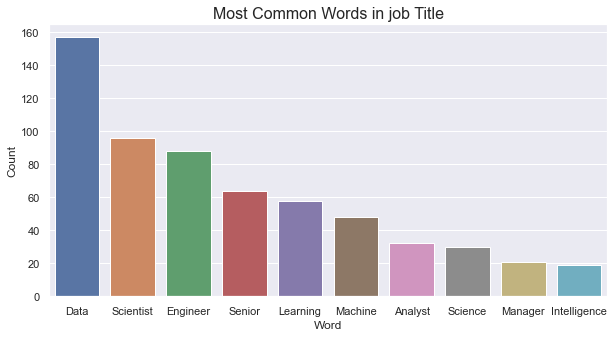

In [23]:
# Visualize the Most Common Words in job Title

# Define figure size
sns.set(rc={"figure.figsize":(10, 5)}) 

# Display barplot
sns.barplot(data = unique_words.loc[0:9], 
            x = "Word", 
            y = 'Count' )

# Give the plot a title
plt.title('Most Common Words in job Title', 
          fontsize=16)

The word with highest count of occurrences in job Title is **data** with almost 160 counts. It is followed by **scientist** and 
**engineer** with almost 100 counts. **Learning**, **machine** and **analyst** words have counts lower than 60.